## Importar librerías

In [1]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

## Carga de los datos

In [2]:
# Ruta de ubicación de los datos
ruta = os.path.abspath('../data/modelos_entrenamiento/')

# Cargar los datos
X_train = pd.read_csv(os.path.join(ruta, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(ruta, 'y_train.csv')).values.ravel()
X_val = pd.read_csv(os.path.join(ruta, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(ruta, 'y_val.csv')).values.ravel()
X_test = pd.read_csv(os.path.join(ruta, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(ruta, 'y_test.csv')).values.ravel()

## Inicializar el modelo de Ramdon Forest Classifier

In [3]:
# Inicializar el modelo RandomForestClassifier
# - n_estimators: número de árboles en el bosque
# - max_depth: profundidad máxima de los árboles
# - random_state: semilla para asegurar la reproducibilidad
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

## Entrenar el modelo con los datos de entrenamiento

In [4]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## Evaluar el modelo en el conjunto de validación

In [6]:
# Evaluar el modelo en el conjunto de validación
val_preds = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
val_recall = recall_score(y_val, val_preds)
val_f1 = f1_score(y_val, val_preds)
val_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

print(f"Exactitud en Validación: {val_accuracy:.2f}")
print(f"Recall en Validación: {val_recall:.2f}")
print(f"F1 Score en Validación: {val_f1:.2f}")
print(f"AUC en Validación: {val_auc:.2f}")

Exactitud en Validación: 0.94
Recall en Validación: 0.92
F1 Score en Validación: 0.93
AUC en Validación: 0.99


Evaluar el modelo en el conjunto de prueba (test)

In [7]:
# Evaluar el modelo en el conjunto de prueba (test)
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Exactitud en Prueba: {test_accuracy:.2f}")
print(f"Recall en Prueba: {test_recall:.2f}")
print(f"F1 Score en Prueba: {test_f1:.2f}")
print(f"AUC en Prueba: {test_auc:.2f}")

Exactitud en Prueba: 0.94
Recall en Prueba: 0.92
F1 Score en Prueba: 0.94
AUC en Prueba: 0.99


In [19]:
feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)


print("\nImportancia de las variables:")
print(feature_importance_df)


Importancia de las variables:
                              feature  importance
11                    Online boarding    0.196571
6               Inflight wifi service    0.157430
4                               Class    0.133116
3                      Type of Travel    0.098026
13             Inflight entertainment    0.067157
12                       Seat comfort    0.044442
15                   Leg room service    0.040787
8              Ease of Online booking    0.040347
1                       Customer Type    0.034911
19                        Cleanliness    0.029350
14                   On-board service    0.028653
5                     Flight Distance    0.024175
18                   Inflight service    0.017685
17                    Checkin service    0.017192
2                                 Age    0.016941
16                   Baggage handling    0.016005
7   Departure/Arrival time convenient    0.010102
10                     Food and drink    0.009679
9                  

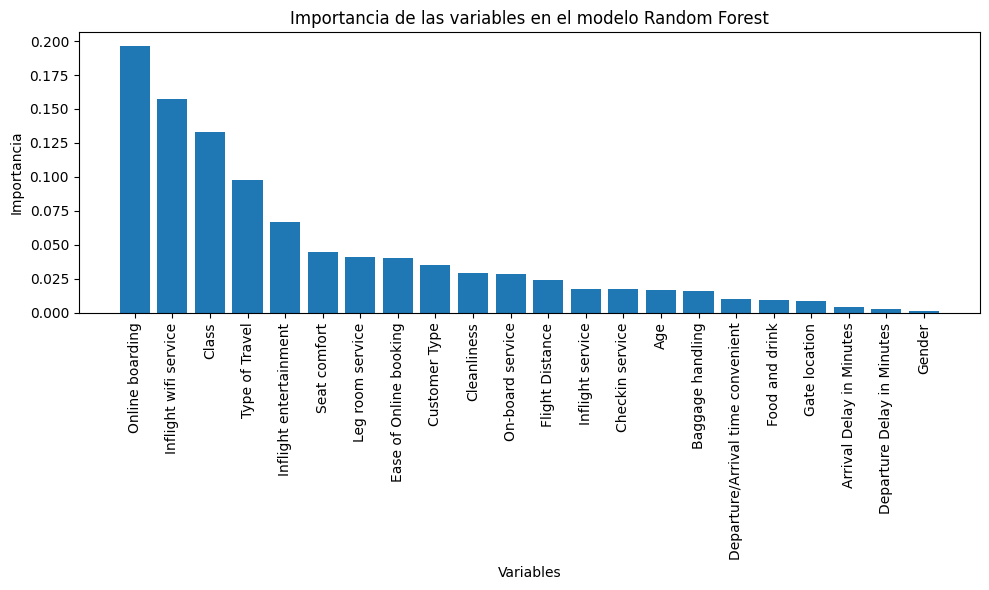

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en el modelo Random Forest')
plt.tight_layout()
plt.show()